# Variable Importance and model Selection

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import gc  #memory management
#
#Setting styles and aesthetics
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

In [2]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
#
test_copy = test.copy()

## Feature Importance

In [3]:
# modelling 
import lightgbm as lgb
#
# utilities
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [4]:
# Select main columns to be used in training
features = train.columns.difference(['target'])
X = train[features]
y = train.target.astype(int)
#
# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', 
                           boosting_type = 'goss', 
                           n_estimators = 1500, 
                           class_weight = 'balanced')
#
# Split into training and validation set
import random
random.seed(123)
#
train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 47)
# Train using early stopping
model.fit(train_features, train_y, 
          eval_metric = 'logloss', 
          verbose = 200)

LGBMClassifier(boosting_type='goss', class_weight='balanced', n_estimators=1500,
               objective='binary')

In [5]:
#define a function to create variable importance dataframe
def get_lgbm_varimp(model, train_columns, max_vars=100):
    
    # Scikit-learn API LGBMClassifier or LGBMRegressor was fitted, 
    # so using feature_importances_ property
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T

    cv_varimp_df.columns = ['feature_name', 'varimp (%)']

    cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)

    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

    return cv_varimp_df
#
get_lgbm_varimp(model, X.columns)

,feature_name,varimp (%)
4,first_transaction_dateday_freq_encode,6.76
27,policy_end_dateday_freq_encode,6.75
3,first_transaction_dateday,6.14
22,lga_name,6.03
23,lga_name_freq_encode,5.90
26,policy_end_dateday,5.62
75,subject_car_colour_freq_encode,5.15
6,first_transaction_datemonth_freq_encode,4.87
74,subject_car_colour,4.54
0,age,4.44


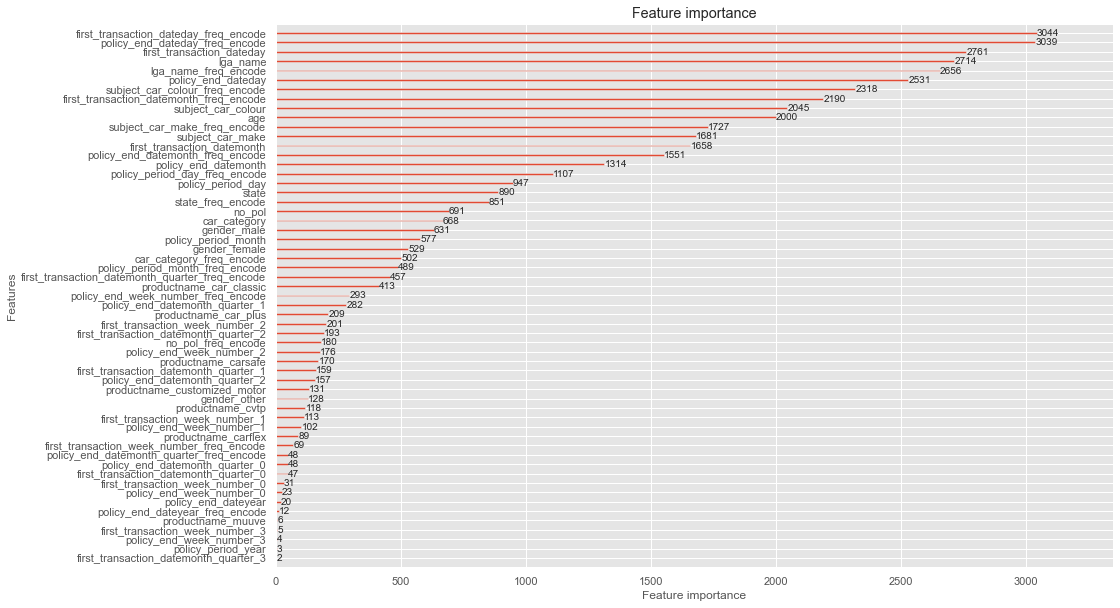

In [6]:
#plot feature importance
ax=lgb.plot_importance(model, max_num_features=100, figsize=(15,10))
plt.show()

In [7]:
#drop irrelevant columns/variables from X features
columns = [
    'first_transaction_datemonth_quarter_3',
    'policy_start_datemonth', 
    'first_transaction_dateyear_freq_encode', 
    'policy_end_datemonth_quarter_3', 
    'productname_motor_cycle', 
    'productname_car_vintage', 
    'first_transaction_dateyear', 
    'policy_start_dateday_freq_encode', 
    'policy_start_week_number_freq_encode',
    'policy_start_week_number_3',
    'policy_start_week_number_2',
    'policy_start_week_number_1',
    'policy_start_week_number_0',
    'policy_start_dateyear_freq_encode',
    'policy_start_dateyear',
    'policy_start_datemonth_quarter_freq_encode',
    'policy_start_datemonth_quarter_3',
    'policy_start_datemonth_quarter_2',
    'policy_start_dateday',
    'policy_start_datemonth_quarter_0',
    'policy_start_datemonth_freq_encode',
    'policy_start_datemonth_quarter_1'
]
#
X.drop(columns, inplace=True, axis=1)

## Selecting features based on correlation

In [8]:
corr = X.corr()
# sns.heatmap(corr)
#
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]

## Check for imbalance in target variable

Class=0, n=9698 (88.076%)
Class=1, n=1313 (11.924%)


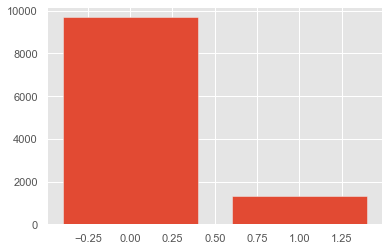

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [10]:
# balance the target variable
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Model Selection

**Baseline Accuracy**

In [11]:
#split model
import random
random.seed(1234)
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
#
#model the training set and calculate the metrics
clf = lgb.LGBMClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_valid)
#
# Check the f1 score of the model
print(f'F1 score on the X_test is: {f1_score(y_valid, y_pred)}')
print('Accuracy: ', accuracy_score(y_valid, y_pred))

F1 score on the X_test is: 0.9203350561397255
Accuracy:  0.9231826774359856


In [12]:
# import relevant variables for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score, KFold

In [13]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
    SVC(decision_function_shape="ovo"),
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', penalty='l2', dual = False),
    AdaBoostClassifier(),
    CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, logging_level='Silent',
                        eval_metric='Accuracy', random_state=42),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective='binary:logistic', eval_metric='logloss', learning_rate=0.1, max_depth=4, seed=27,
                  n_estimators=100),
    lgb.LGBMClassifier(objective='binary', 
                           boosting_type = 'goss', 
                           n_estimators = 1500, 
                           class_weight = 'balanced'),
    DecisionTreeClassifier(max_depth = 2)
]
#
kfold = KFold(n_splits=5, random_state=7)
CV = 5
#
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df.groupby('model_name').accuracy.mean().sort_values())

model_name
RandomForestClassifier       0.44
SVC                          0.49
LogisticRegression           0.50
DecisionTreeClassifier       0.64
KNeighborsClassifier         0.77
AdaBoostClassifier           0.86
GradientBoostingClassifier   0.87
XGBClassifier                0.89
LGBMClassifier               0.92
CatBoostClassifier           0.92
Name: accuracy, dtype: float64


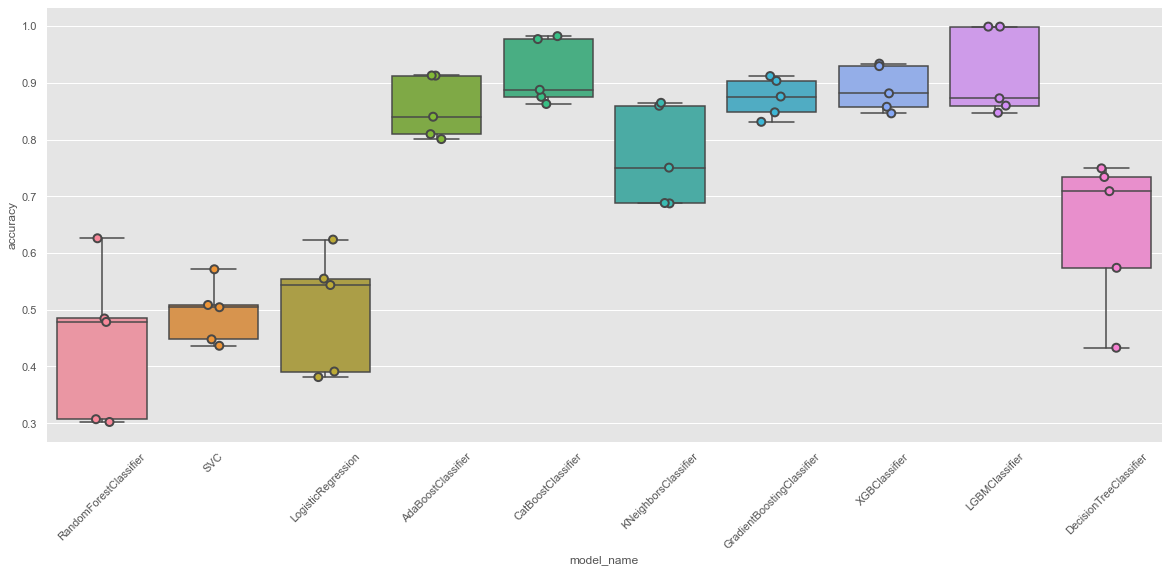

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## Parameter Tuning

LightGBM Classifier has the highest accuracy

In [15]:
# import random 
# random.seed(12345)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)
# #Set the minimum error arbitrarily large
# # min = 99999999999999999999999 
# count = 0 #Used for keeping track of the iteration number
# #How many runs to perform using randomly selected hyperparameters
# iterations = 10
# for i in range(iterations):
# #     print('iteration number', count)
#     count += 1 #increment count
#     try:
#         d_train = lgb.Dataset(x_train, label=y_train) #Load in data
#         params = {} #initialize parameters
#         params['learning_rate'] = np.random.uniform(0, 1)
#         params['boosting_type'] = np.random.choice(['gbdt', 'dart', 'goss'])
#         params['objective'] = 'binary'
#         params['metric'] = 'binary_logloss'
#         params['sub_feature'] = np.random.uniform(0, 1)
#         params['num_leaves'] = np.random.randint(30, 35)
#         params['min_data'] = np.random.randint(10, 20)
#         params['max_depth'] = np.random.randint(10, 15)
#         params['feature_fraction'] = np.random.uniform(0.5, 1)
#         params['class_weight'] = 'balanced'
#         params['n_estimators'] = np.random.randint(500, 1500)
#         iterations = np.random.randint(10, 15)
# #         print(params, iterations)
#         #Train using selected parameters
#         clf = lgb.train(params, d_train, iterations)
#         y_pred=clf.predict(x_test) #Create predictions on test set
#         f1_score=f1_score(y_test, y_pred)
#         print('f1_score:', f1_score)
#         print('Used params', params)
# #         if mae < min:
# #             min = mae
# #             pp = params 
#     except: #in case something goes wrong
#         print('failed with')
#         print(params)
# # print("*" * 50)
# # print('Minimum is: ', min)
# # print('Used params', pp)

In [16]:
import random 
random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 47)
#
lgbm = lgb.LGBMClassifier(objective = 'binary', metric = 'binary_logloss', class_weight = 'balanced',
                            random_state=10, 
                            boosting_type = 'gbdt',
                            num_leaves=30, 
                            max_depth=8,
                            feature_fraction=0.5,  
                            bagging_fraction=0.8, 
                            bagging_freq=15, 
                            n_estimators = 1500,
                            learning_rate=0.01)
lgbm.fit(x_train, y_train)
#
#
lgbm_pred=lgbm.predict(x_test)
#
print(f'F1 score: {f1_score(y_test, lgbm_pred)}')
print("Accuracy:", accuracy_score(y_test, lgbm_pred))
#
from sklearn.metrics import classification_report
#classification Report
print(classification_report(y_test, lgbm_pred))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
F1 score: 0.923352435530086
Accuracy: 0.9264478432720399
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2930
           1       0.96      0.89      0.92      2889

    accuracy                           0.93      5819
   macro avg       0.93      0.93      0.93      5819
weighted avg       0.93      0.93      0.93      5819



In [17]:
# get column names are irrelevant based on our analysis
print(train.columns.difference(X.columns))

Index(['first_transaction_datemonth_quarter_3',
       'first_transaction_datemonth_quarter_freq_encode',
       'first_transaction_dateyear', 'first_transaction_dateyear_freq_encode',
       'first_transaction_week_number_freq_encode',
       'policy_end_datemonth_quarter_3',
       'policy_end_datemonth_quarter_freq_encode',
       'policy_end_week_number_freq_encode', 'policy_start_dateday',
       'policy_start_dateday_freq_encode', 'policy_start_datemonth',
       'policy_start_datemonth_freq_encode',
       'policy_start_datemonth_quarter_0', 'policy_start_datemonth_quarter_1',
       'policy_start_datemonth_quarter_2', 'policy_start_datemonth_quarter_3',
       'policy_start_datemonth_quarter_freq_encode', 'policy_start_dateyear',
       'policy_start_dateyear_freq_encode', 'policy_start_week_number_0',
       'policy_start_week_number_1', 'policy_start_week_number_2',
       'policy_start_week_number_3', 'policy_start_week_number_freq_encode',
       'productname_car_vintage', 

In [24]:
drop_cols = ['first_transaction_datemonth_quarter_3',
       'first_transaction_datemonth_quarter_freq_encode',
       'first_transaction_dateyear', 'first_transaction_dateyear_freq_encode',
       'first_transaction_week_number_freq_encode',
       'policy_end_datemonth_quarter_3',
       'policy_end_datemonth_quarter_freq_encode',
       'policy_end_week_number_freq_encode', 'policy_start_dateday',
       'policy_start_dateday_freq_encode', 'policy_start_datemonth',
       'policy_start_datemonth_freq_encode',
       'policy_start_datemonth_quarter_0', 'policy_start_datemonth_quarter_1',
       'policy_start_datemonth_quarter_2', 'policy_start_datemonth_quarter_3',
       'policy_start_datemonth_quarter_freq_encode', 'policy_start_dateyear',
       'policy_start_dateyear_freq_encode', 'policy_start_week_number_0',
       'policy_start_week_number_1', 'policy_start_week_number_2',
       'policy_start_week_number_3', 'policy_start_week_number_freq_encode',
       'productname_car_vintage', 'productname_motor_cycle', 'id']
#
# predict the test dataset
pred = lgbm.predict(test.drop(drop_cols, axis=1))
#
submission = test_copy[['id']]
submission['target'] = pd.DataFrame(pred)
submission.rename(columns = {'id':'ID'}, inplace = True)
submission

,ID,target
0,ID_009D84L,0
1,ID_01QM0NU,0
2,ID_024NJLZ,0
3,ID_02NOVWQ,0
4,ID_02VSP68,0
...,...,...
4693,ID_ZYTNJOK,0
4694,ID_ZYXX5AF,0
4695,ID_ZYYOZ5L,0
4696,ID_ZZDXQSI,0


In [25]:
submission.to_csv('lightGBM_submission.csv', index=False)